In [0]:
!pip install -U -q PyDrive

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
import io
uploaded1 = files.upload()
uploaded2 = files.upload()

if __name__ == "__main__":
    df_train = pd.read_csv(io.StringIO(uploaded1['train_aozora.csv'].decode('utf-8')), sep='\t')
    df_train['category_id'] = df_train.type.factorize()[0]

    train_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_train, df_train["category_id"], num_epochs=None, shuffle=True)

    df_test = pd.read_csv(io.StringIO(uploaded2['test_aozora.csv'].decode('utf-8')), sep='\t')
    df_test['category_id'] = df_test.type.factorize()[0]

    predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_test, df_test["category_id"], shuffle=False)
 
    embedded_text_feature_column = hub.text_embedding_column(
        key="text", 
        module_spec="https://tfhub.dev/google/nnlm-ja-dim128/1")

    estimator = tf.estimator.DNNClassifier(
        hidden_units=[512, 128],
        feature_columns=[embedded_text_feature_column],
        n_classes=2,
        optimizer=tf.train.AdamOptimizer(learning_rate=0.003))

    estimator.train(input_fn=train_input_fn, steps=1000);
    test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
    print("Test set accuracy: {accuracy}".format(**test_eval_result))

Saving train_aozora.csv to train_aozora.csv


Saving test_aozora.csv to test_aozora.csv
INFO:tensorflow:Using default config.


I0321 03:28:15.124363 140403405121408 estimator.py:1739] Using default config.


W0321 03:28:15.132817 140403405121408 estimator.py:1760] Using temporary folder as model directory: /tmp/tmpRIQv3O


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb1fa97bb50>, '_model_dir': '/tmp/tmpRIQv3O', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


I0321 03:28:15.144573 140403405121408 estimator.py:201] Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb1fa97bb50>, '_model_dir': '/tmp/tmpRIQv3O', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


Instructions for updating:
Colocations handled automatically by placer.


W0321 03:28:15.995846 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0321 03:28:16.035998 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: __init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0321 03:28:16.041075 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling model_fn.


I0321 03:28:16.060374 140403405121408 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0321 03:28:16.247524 140403405121408 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0321 03:28:16.311326 140403405121408 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use tf.cast instead.


W0321 03:28:16.457665 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_estimator/python/estimator/canned/head.py:436: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Done calling model_fn.


I0321 03:28:16.733782 140403405121408 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0321 03:28:16.736715 140403405121408 basic_session_run_hooks.py:527] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0321 03:28:17.069545 140403405121408 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0321 03:28:17.876523 140403405121408 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0321 03:28:18.868925 140403405121408 session_manager.py:493] Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0321 03:28:18.898328 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/training/monitored_session.py:809: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpRIQv3O/model.ckpt.


I0321 03:28:19.346246 140403405121408 basic_session_run_hooks.py:594] Saving checkpoints for 0 into /tmp/tmpRIQv3O/model.ckpt.


INFO:tensorflow:loss = 87.54019, step = 1


I0321 03:28:22.849494 140403405121408 basic_session_run_hooks.py:249] loss = 87.54019, step = 1


INFO:tensorflow:global_step/sec: 63.8856


I0321 03:28:24.414288 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 63.8856


INFO:tensorflow:loss = 7.603038, step = 101 (1.568 sec)


I0321 03:28:24.417663 140403405121408 basic_session_run_hooks.py:247] loss = 7.603038, step = 101 (1.568 sec)


INFO:tensorflow:global_step/sec: 66.8454


I0321 03:28:25.910242 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 66.8454


INFO:tensorflow:loss = 0.6121023, step = 201 (1.502 sec)


I0321 03:28:25.919368 140403405121408 basic_session_run_hooks.py:247] loss = 0.6121023, step = 201 (1.502 sec)


INFO:tensorflow:global_step/sec: 67.5051


I0321 03:28:27.391597 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 67.5051


INFO:tensorflow:loss = 0.53011465, step = 301 (1.476 sec)


I0321 03:28:27.395032 140403405121408 basic_session_run_hooks.py:247] loss = 0.53011465, step = 301 (1.476 sec)


INFO:tensorflow:global_step/sec: 67.2229


I0321 03:28:28.879204 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 67.2229


INFO:tensorflow:loss = 0.06783628, step = 401 (1.490 sec)


I0321 03:28:28.884916 140403405121408 basic_session_run_hooks.py:247] loss = 0.06783628, step = 401 (1.490 sec)


INFO:tensorflow:global_step/sec: 67.3574


I0321 03:28:30.363804 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 67.3574


INFO:tensorflow:loss = 0.0412253, step = 501 (1.490 sec)


I0321 03:28:30.374752 140403405121408 basic_session_run_hooks.py:247] loss = 0.0412253, step = 501 (1.490 sec)


INFO:tensorflow:global_step/sec: 66.654


I0321 03:28:31.864111 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 66.654


INFO:tensorflow:loss = 0.03437288, step = 601 (1.497 sec)


I0321 03:28:31.872136 140403405121408 basic_session_run_hooks.py:247] loss = 0.03437288, step = 601 (1.497 sec)


INFO:tensorflow:global_step/sec: 65.7625


I0321 03:28:33.384730 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 65.7625


INFO:tensorflow:loss = 0.023898846, step = 701 (1.523 sec)


I0321 03:28:33.395319 140403405121408 basic_session_run_hooks.py:247] loss = 0.023898846, step = 701 (1.523 sec)


INFO:tensorflow:global_step/sec: 66.8822


I0321 03:28:34.879901 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 66.8822


INFO:tensorflow:loss = 0.012158984, step = 801 (1.498 sec)


I0321 03:28:34.892868 140403405121408 basic_session_run_hooks.py:247] loss = 0.012158984, step = 801 (1.498 sec)


INFO:tensorflow:global_step/sec: 66.5658


I0321 03:28:36.382155 140403405121408 basic_session_run_hooks.py:680] global_step/sec: 66.5658


INFO:tensorflow:loss = 0.010238534, step = 901 (1.493 sec)


I0321 03:28:36.385659 140403405121408 basic_session_run_hooks.py:247] loss = 0.010238534, step = 901 (1.493 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpRIQv3O/model.ckpt.


I0321 03:28:37.875391 140403405121408 basic_session_run_hooks.py:594] Saving checkpoints for 1000 into /tmp/tmpRIQv3O/model.ckpt.


INFO:tensorflow:Loss for final step: 0.0076704123.


I0321 03:28:42.068917 140403405121408 estimator.py:359] Loss for final step: 0.0076704123.


INFO:tensorflow:Calling model_fn.


I0321 03:28:42.102144 140403405121408 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0321 03:28:42.136007 140403405121408 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0321 03:28:42.186539 140403405121408 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


W0321 03:28:42.547048 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/metrics_impl.py:2002: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


W0321 03:28:42.985676 140403405121408 metrics_impl.py:783] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


W0321 03:28:43.169298 140403405121408 metrics_impl.py:783] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


INFO:tensorflow:Done calling model_fn.


I0321 03:28:43.200759 140403405121408 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-03-21T03:28:43Z


I0321 03:28:43.230609 140403405121408 evaluation.py:257] Starting evaluation at 2019-03-21T03:28:43Z


INFO:tensorflow:Graph was finalized.


I0321 03:28:43.379901 140403405121408 monitored_session.py:222] Graph was finalized.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0321 03:28:43.383008 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /tmp/tmpRIQv3O/model.ckpt-1000


I0321 03:28:43.397139 140403405121408 saver.py:1270] Restoring parameters from /tmp/tmpRIQv3O/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


I0321 03:28:43.762571 140403405121408 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0321 03:28:44.649503 140403405121408 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-03-21-03:28:45


I0321 03:28:45.289196 140403405121408 evaluation.py:277] Finished evaluation at 2019-03-21-03:28:45


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9724771, accuracy_baseline = 0.5, auc = 0.9851234, auc_precision_recall = 0.9858832, average_loss = 0.12268251, global_step = 1000, label/mean = 0.5, loss = 13.372394, precision = 0.963964, prediction/mean = 0.5118377, recall = 0.98165137


I0321 03:28:45.296303 140403405121408 estimator.py:1979] Saving dict for global step 1000: accuracy = 0.9724771, accuracy_baseline = 0.5, auc = 0.9851234, auc_precision_recall = 0.9858832, average_loss = 0.12268251, global_step = 1000, label/mean = 0.5, loss = 13.372394, precision = 0.963964, prediction/mean = 0.5118377, recall = 0.98165137


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpRIQv3O/model.ckpt-1000


I0321 03:28:45.583834 140403405121408 estimator.py:2039] Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpRIQv3O/model.ckpt-1000


Test set accuracy: 0.972477078438


INFO:tensorflow:Calling model_fn.


I0321 03:28:59.435003 140403405121408 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0321 03:28:59.469573 140403405121408 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0321 03:28:59.529325 140403405121408 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0321 03:28:59.700725 140403405121408 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Graph was finalized.


I0321 03:28:59.859220 140403405121408 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpRIQv3O/model.ckpt-1000


I0321 03:28:59.869537 140403405121408 saver.py:1270] Restoring parameters from /tmp/tmpRIQv3O/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


I0321 03:29:00.200438 140403405121408 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0321 03:29:01.096290 140403405121408 session_manager.py:493] Done running local_init_op.


Instructions for updating:
Use tf.cast instead.


W0321 03:29:01.490120 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/confusion_matrix.py:193: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


W0321 03:29:01.492763 140403405121408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/confusion_matrix.py:194: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


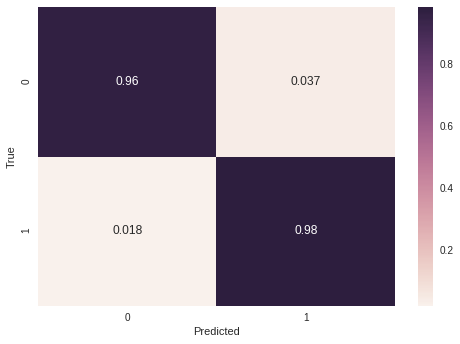

In [0]:
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    0, 1
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(df_test["category_id"], 
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");